In [1]:
from IPython.display import display, HTML
import spot
spot.setup()

To translate a formula into a Testing Automaton

Start by building a Buchi automaton

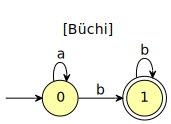

In [2]:
f = spot.formula('a U Gb')
a = f.translate('ba')
a

Then, gather all the atomic proposition in the formula, and create an automaton with changesets

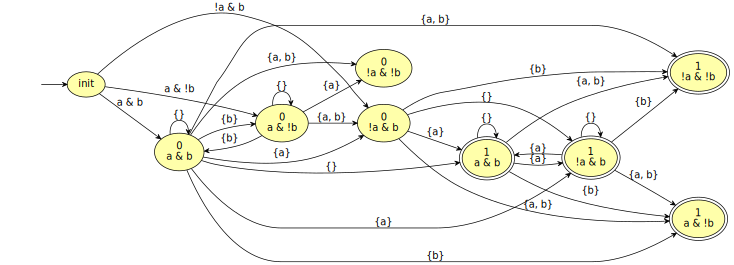

In [3]:
propset = spot.atomic_prop_collect_as_bdd(f, a)
ta = spot.tgba_to_ta(a, propset, True, True, False, False, True)
ta.show('.A')

Then, remove dead states, and remove stuttering transitions (i.e., transitions labeled by `{}`), marking as *livelock accepting* (rectangles) any states from which there exists a an accepting path labeled by `{}`.

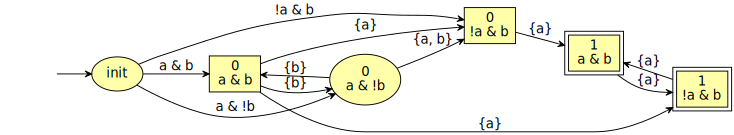

In [4]:
ta = spot.tgba_to_ta(a, propset, True, True, False, False, False)
ta.show('.A')

Finally, use bisimulation to minimize the number of states.

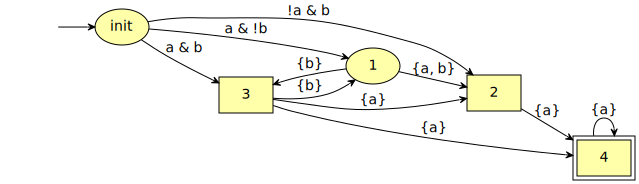

In [5]:
spot.minimize_ta(ta).show('.A')